In [1]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import class_weight



In [2]:
import pandas as pd
file_path = 'banklimpio.csv'
X_cleaned1 = pd.read_csv(file_path)
X_cleaned1 = pd.read_csv(file_path, sep=',')  
X_cleaned1

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,73,2850,17,300,1,40,8,0,0,1,...,0,0,0,0,0,0,0,0,1,1
41364,25,505,17,386,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
41365,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
41366,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


Verificar Multicolinealidad

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Añadir constante a X para calcular VIF
X_with_const = sm.add_constant(X_cleaned1)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]


for i in range(1,len(vif_data)):
    if vif_data["VIF"][i]>5:
        print(vif_data["Variable"][i],vif_data["VIF"][i])


MODELO 1: VARIABLE DE RESPUESTA Y

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import numpy as np

X= X_cleaned1.drop(columns='y_yes')
# Separar variables predictoras (X) y la variable objetivo (y)
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

In [5]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.15402955123026213
MSE:  0.06591518618694843
RMSE:  0.25673952984873294


In [6]:

# usar MSE - error cuadrático medio
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_squared_error')
mse_scores = - scores
scores = cross_val_score(model, X, y, cv=100, scoring='neg_mean_absolute_error')

mae_scores = -scores

#print("MAE scores for each fold:", mae_scores)
print("Mean MAE:", np.mean(mae_scores))

rmse_scores = np.sqrt(mse_scores)

print("Mean MSE:", mse_scores.mean())
print("Mean RMSE:", rmse_scores.mean())



Mean MAE: 0.15803467054984757
Mean MSE: 0.06838827753233823
Mean RMSE: 0.2209103107741984


## MODELO 1: OLS VARIABLE DE RESPUESTA Y

In [7]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


y = X_cleaned1['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión usando mínimos cuadrados ordinarios (OLS)
md = sm.OLS(y_train, X_train).fit()

# Resumen de resultados
print(md.summary())

# Extraer coeficientes y p-valores en un DataFrame
results = pd.DataFrame({
    'Variable': md.params.index,
    'Coeficiente': md.params.values,
    'p-valor': md.pvalues.values
})
# Filtrar variables significativas (usualmente p-valor < 0.01)
significativas = results[results['p-valor'] < 0.1]
no_significativas = results[results['p-valor'] >= 0.1]



# Mostrar resultados
print("Variables Significativas (p-valor < 1%):")
print(significativas)

print("\nVariables No Significativas (p-valor >= 1%):")
print(no_significativas)
no_significativas

                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     237.8
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:23:55   Log-Likelihood:                -1825.4
No. Observations:               31026   AIC:                             3705.
Df Residuals:                   30999   BIC:                             3930.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1239    

,Variable,Coeficiente,p-valor
6,pdays,0.000024,0.216622
9,job_management,0.000110,0.982193
12,job_technician,-0.004352,0.346102
13,marital_married,-0.001187,0.802205
19,contact_telephone,-0.005542,0.371488


### MODELO 1: OLS SOLO CON VARIABLES SIGNIFICATIVAS

In [8]:
X_significativas = X_cleaned1[significativas['Variable'].values[1:]]  # [1:] para excluir 'const'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_significativas, X_test_significativas, y_train_significativas, y_test_significativas = train_test_split(X_significativas, y, random_state=1)

# Agregar la constante para el modelo OLS
X_train_significativas = sm.add_constant(X_train_significativas)
X_test_significativas = sm.add_constant(X_test_significativas)

# Ajustar el modelo OLS
md_significativas = sm.OLS(y_train_significativas, X_train_significativas).fit()

# Realizar predicciones sobre el conjunto de prueba
y_pred_significativas = md_significativas.predict(X_test_significativas)

# Calcular MAE, MSE y RMSE
mae = mean_absolute_error(y_test_significativas, y_pred_significativas)
mse = mean_squared_error(y_test_significativas, y_pred_significativas)
rmse = np.sqrt(mse)

# Mostrar los resultados
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(md_significativas.summary())

MAE: 0.15455992599170326
MSE: 0.06641499503723071
RMSE: 0.2577110689070819
                            OLS Regression Results                            
Dep. Variable:                  y_yes   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     294.3
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:23:55   Log-Likelihood:                -1827.2
No. Observations:               31026   AIC:                             3698.
Df Residuals:                   31004   BIC:                             3882.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

## Modelo 2 logistico completo

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
import statsmodels.api as sm


# Separar variables predictoras (X) y la variable objetivo (y)
X = X_cleaned1.drop(columns='y_yes')
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)

# Crear y entrenar el modelo de regresión logística con balanceo de clases
model_logi = LogisticRegression(max_iter=1000, class_weight='balanced')
model_logi.fit(X_train, y_train)

# Realizar predicciones
y_predlog = model_logi.predict(X_test)

# Calcular y mostrar métricas de clasificación
accuracy = accuracy_score(y_test, y_predlog)
precision = precision_score(y_test, y_predlog)
recall = recall_score(y_test, y_predlog)
f1 = f1_score(y_test, y_predlog)


# Confusion matrix y reporte de clasificación
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_predlog))

print("\nClassification Report:")
print(classification_report(y_test, y_predlog,target_names=['No acepta', 'Acepta']))

# Obtener un resumen detallado con statsmodels
# Añadir una constante al conjunto de datos
X_with_const = sm.add_constant(X)  # Asegúrate de incluir la constante para el modelo en statsmodels

# Ajustar el modelo de regresión logística con statsmodels
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Mostrar el resumen del modelo
print(result.summary())

# Convertir el índice en una columna llamada 'Variable'
summary_df = pd.DataFrame({
    'Variable': result.params.index,
    'Coef': result.params,
    'StdErr': result.bse,
    'Z': result.tvalues,
    'P>|Z|': result.pvalues,
    'Conf. Interval Low': result.conf_int()[0],
    'Conf. Interval High': result.conf_int()[1]
}).reset_index()

# Renombrar la columna que contiene el índice
summary_df = summary_df.drop(columns="index")



# Filtrar variables significativas (usualmente p-valor < 0.01)
significativaslog = results[results['p-valor'] < 0.1]
no_significativaslog = results[results['p-valor'] >= 0.1]

print("\nVariables No Significativas (p-valor >= 1%):")
print(no_significativas)

# Mostrar el DataFrame con la columna 'Variable'
summary_df
no_significativaslog




Confusion Matrix:
[[7114 1939]
 [ 139  737]]

Classification Report:
              precision    recall  f1-score   support

   No acepta       0.98      0.79      0.87      9053
      Acepta       0.28      0.84      0.41       876

    accuracy                           0.79      9929
   macro avg       0.63      0.81      0.64      9929
weighted avg       0.92      0.79      0.83      9929

Optimization terminated successfully.
         Current function value: 0.211143
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                41368
Model:                          Logit   Df Residuals:                    41341
Method:                           MLE   Df Model:                           26
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2858
Time:                        22:23:56   Log-Likelihood:                -8734.5
converged:                 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Variable,Coeficiente,p-valor
6,pdays,0.000024,0.216622
9,job_management,0.000110,0.982193
12,job_technician,-0.004352,0.346102
13,marital_married,-0.001187,0.802205
19,contact_telephone,-0.005542,0.371488


### Modelo 2: Logistico significativas

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import statsmodels.api as sm
import numpy as np

# Seleccionar las variables significativas (excluyendo 'const')
X_significativas = X_cleaned1[significativaslog['Variable'].values[1:]]  # [1:] para excluir 'const'
y = X_cleaned1['y_yes']  # Asegúrate de que 'y_yes' sea la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_significativas, X_test_significativas, y_train_significativas, y_test_significativas = train_test_split(
    X_significativas, y, random_state=1
)

# Agregar la constante para el modelo Logit
X_train_significativas = sm.add_constant(X_train_significativas)
X_test_significativas = sm.add_constant(X_test_significativas)

# Ajustar el modelo de regresión logística
md_significativas = sm.Logit(y_train_significativas, X_train_significativas).fit()

# Realizar predicciones sobre el conjunto de prueba
y_pred_proba = md_significativas.predict(X_test_significativas)

# Convertir probabilidades a clases (0 o 1) usando un umbral de 0.5
y_pred_significativas = [1 if prob >= 0.5 else 0 for prob in y_pred_proba]

# Calcular métricas de clasificación
accuracy = accuracy_score(y_test_significativas, y_pred_significativas)
precision = precision_score(y_test_significativas, y_pred_significativas)
recall = recall_score(y_test_significativas, y_pred_significativas)
f1 = f1_score(y_test_significativas, y_pred_significativas)

# Mostrar los resultados

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_significativas, y_pred_significativas))
print("\nClassification Report:")
print(classification_report(y_test_significativas, y_pred_significativas,target_names=['No acepta', 'Acepta']))

# Mostrar el resumen del modelo logístico
md_significativas.summary()



Optimization terminated successfully.
         Current function value: 0.212202
         Iterations 9

Confusion Matrix:
[[9301  123]
 [ 770  148]]

Classification Report:
              precision    recall  f1-score   support

   No acepta       0.92      0.99      0.95      9424
      Acepta       0.55      0.16      0.25       918

    accuracy                           0.91     10342
   macro avg       0.73      0.57      0.60     10342
weighted avg       0.89      0.91      0.89     10342



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                31026
Model:                          Logit   Df Residuals:                    31004
Method:                           MLE   Df Model:                           21
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.2790
Time:                        22:23:56   Log-Likelihood:                -6583.8
converged:                       True   LL-Null:                       -9131.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.4555      0.168    -14.602      0.000      -2.785      -2.126
age                     0.0037      0.003      1.384      0.167      -0.002       0.009
balance              1.314e-05    6.1e-06      2.156      0.031     1.2e-06    2.51e-05
day                    -0.0112      0.003     -3.743      0.000      -0.017      -0.005
duration                0.0060      0.000     40.530      0.000       0.006       0.006
campaign               -0.1450      0.016     -8.945      0.000      -0.177      -0.113
previous                0.1304      0.010     13.562      0.000       0.112       0.149
job_blue-collar        -0.3857      0.078     -4.927      0.000      -0.539      -0.232
job_retired             0.4510      0.101      4.455      0.000       0.253       0.649
job_services           -0.2652      0.098     -2.703      0.007      -0.458      -0.073
marital_single          0.2748      0.057      4.794      0.000       0.162       0.387
education_secondary     0.2331      0.072      3.225      0.001       0.091       0.375
education_tertiary      0.4810      0.078      6.152      0.000       0.328       0.634
housing_yes            -1.0031      0.055    -18.295      0.000      -1.111      -0.896
loan_yes               -0.7811      0.086     -9.064      0.000      -0.950      -0.612
contact_unknown        -2.1934      0.114    -19.242      0.000      -2.417      -1.970
month_aug              -1.2674      0.078    -16.258      0.000      -1.420      -1.115
month_feb              -0.7123      0.093     -7.662      0.000      -0.894      -0.530
month_jul              -1.3831      0.084    -16.457      0.000      -1.548      -1.218
month_jun               0.1048      0.103      1.017      0.309      -0.097       0.307
month_may              -0.9850      0.078    -12.668      0.000      -1.137      -0.833
month_nov              -1.2796      0.090    -14.188      0.000      -1.456      -1.103
=======================================================================================
"""

Serializado

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import statsmodels.api as sm
import numpy as np
import pickle

# Seleccionar las variables significativas (excluyendo 'const')
X_significativas = X_cleaned1[significativaslog['Variable'].values[1:]]  # [1:] para excluir 'const'
y = X_cleaned1['y_yes']  # Asegúrate de que 'y_yes' sea la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_significativas, X_test_significativas, y_train_significativas, y_test_significativas = train_test_split(
    X_significativas, y, random_state=1
)

# Agregar la constante para el modelo Logit
X_train_significativas = sm.add_constant(X_train_significativas)
X_test_significativas = sm.add_constant(X_test_significativas)

# Ajustar el modelo de regresión logística
md_significativas = sm.Logit(y_train_significativas, X_train_significativas).fit()

# Guardar el modelo en un archivo .pkl
with open('modelo_logistico_significativas.pkl', 'wb') as file:
    pickle.dump(md_significativas, file)

# Cargar el modelo en el futuro
with open('modelo_logistico_significativas.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Realizar predicciones sobre el conjunto de prueba usando el modelo cargado
y_pred_proba = loaded_model.predict(X_test_significativas)

# Convertir probabilidades a clases (0 o 1) usando un umbral de 0.5
y_pred_significativas = [1 if prob >= 0.45 else 0 for prob in y_pred_proba]

# Calcular métricas de clasificación
accuracy = accuracy_score(y_test_significativas, y_pred_significativas)
precision = precision_score(y_test_significativas, y_pred_significativas)
recall = recall_score(y_test_significativas, y_pred_significativas)
f1 = f1_score(y_test_significativas, y_pred_significativas)

# Mostrar los resultados
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_significativas, y_pred_significativas))

print("\nClassification Report:")
print(classification_report(y_test_significativas, y_pred_significativas, target_names=['No acepta', 'Acepta']))

# Mostrar el resumen del modelo logístico
print(loaded_model.summary())


Optimization terminated successfully.
         Current function value: 0.212202
         Iterations 9
Accuracy: 0.9136530651711467
Precision: 0.5338753387533876
Recall: 0.21459694989106753
F1 Score: 0.3061383061383061

Confusion Matrix:
[[9252  172]
 [ 721  197]]

Classification Report:
              precision    recall  f1-score   support

   No acepta       0.93      0.98      0.95      9424
      Acepta       0.53      0.21      0.31       918

    accuracy                           0.91     10342
   macro avg       0.73      0.60      0.63     10342
weighted avg       0.89      0.91      0.90     10342

                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                31026
Model:                          Logit   Df Residuals:                    31004
Method:                           MLE   Df Model:                           21
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:               

## Modelo 3 Redes neuronales

In [12]:
train = X_cleaned1.sample(frac=0.8, random_state=100)
train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
12593,29,55,10,235,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13886,28,416,17,345,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4607,32,728,21,125,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
29278,53,1311,14,61,3,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2415,43,42,13,188,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [13]:
test = X_cleaned1.drop(train.index)
test.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
27,52,113,5,127,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
28,46,-246,5,255,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
40,50,49,5,180,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
44,58,-364,5,355,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [14]:
print(train.shape)
print(test.shape)

(33094, 27)
(8274, 27)


In [15]:
sys.setrecursionlimit(999)

In [16]:
X_cleaned1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_management', 'job_retired', 'job_services',
       'job_technician', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb',
       'month_jul', 'month_jun', 'month_may', 'month_nov', 'y_yes'],
      dtype='object')

In [17]:
X_cleaned1.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        int64
job_management         int64
job_retired            int64
job_services           int64
job_technician         int64
marital_married        int64
marital_single         int64
education_secondary    int64
education_tertiary     int64
housing_yes            int64
loan_yes               int64
contact_telephone      int64
contact_unknown        int64
month_aug              int64
month_feb              int64
month_jul              int64
month_jun              int64
month_may              int64
month_nov              int64
y_yes                  int64
dtype: object

In [18]:
# Definir las columnas categóricas y continuas
categorical_features = []

# Encontrar las columnas dummificadas
for col in X_cleaned1.columns:
    if "_" in col and col != "y_yes":  
        categorical_features.append(col)


continuous_features = [col for col in X_cleaned1.columns if col not in categorical_features and col != "y_yes"]

# Mostrar las listas
print("Categorical dummies:", categorical_features)
print("Continuous features:", continuous_features)

Categorical dummies: ['job_blue-collar', 'job_management', 'job_retired', 'job_services', 'job_technician', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_feb', 'month_jul', 'month_jun', 'month_may', 'month_nov']
Continuous features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping

X = X_cleaned1.drop(columns=['y_yes'])



# Definir la variable objetivo
y = X_cleaned1['y_yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_X))

# Calcular los pesos de clase
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_y),
    y=train_y
)
class_weights = {0: 1.0, 1: 10.0} 
print("Pesos de clase:", class_weights)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=1)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

# Configurar EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
norm.adapt(train_X_resampled)



Pesos de clase: {0: 1.0, 1: 10.0}


### Redes 1

In [20]:
import time
import tensorflow as tf

# Adaptar la normalización a los datos de entrenamiento
norm.adapt(train_X_resampled)

# Iniciar el cronómetro
start_time = time.time()

# Definir el modelo de red neuronal profunda con capas densas y Dropout
linear_model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_X_resampled.shape[1],)),  # Especifica el tamaño de las características de entrada
    norm,  # Normalización de entrada
    tf.keras.layers.Dense(units=252, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=252, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
linear_model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Entrenamiento del modelo
history_1 = linear_model_1.fit(
    train_X_resampled,
    train_y_resampled,
    epochs=150,
    validation_split=0.2,
    verbose=0,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Medir el tiempo de entrenamiento
elapsed_time_1 = time.time() - start_time
print(f"Tiempo de entrenamiento: {elapsed_time_1:.2f} segundos")

# Guardar el modelo en formato .keras
linear_model_1.save("modelo_clasificacion.keras")

# Para cargar el modelo en el futuro
loaded_model = tf.keras.models.load_model("modelo_clasificacion.keras")

# Verificar que el modelo cargado funciona
loss, accuracy, auc = loaded_model.evaluate(train_X_resampled, train_y_resampled)
print(f"Loss: {loss}, Accuracy: {accuracy}, AUC: {auc}")



Tiempo de entrenamiento: 139.97 segundos
1888/1888 [==============================] - 2s 828us/step - loss: 0.2246 - accuracy: 0.9077 - auc: 0.9892
Loss: 0.22458411753177643, Accuracy: 0.907680332660675, AUC: 0.9892066717147827


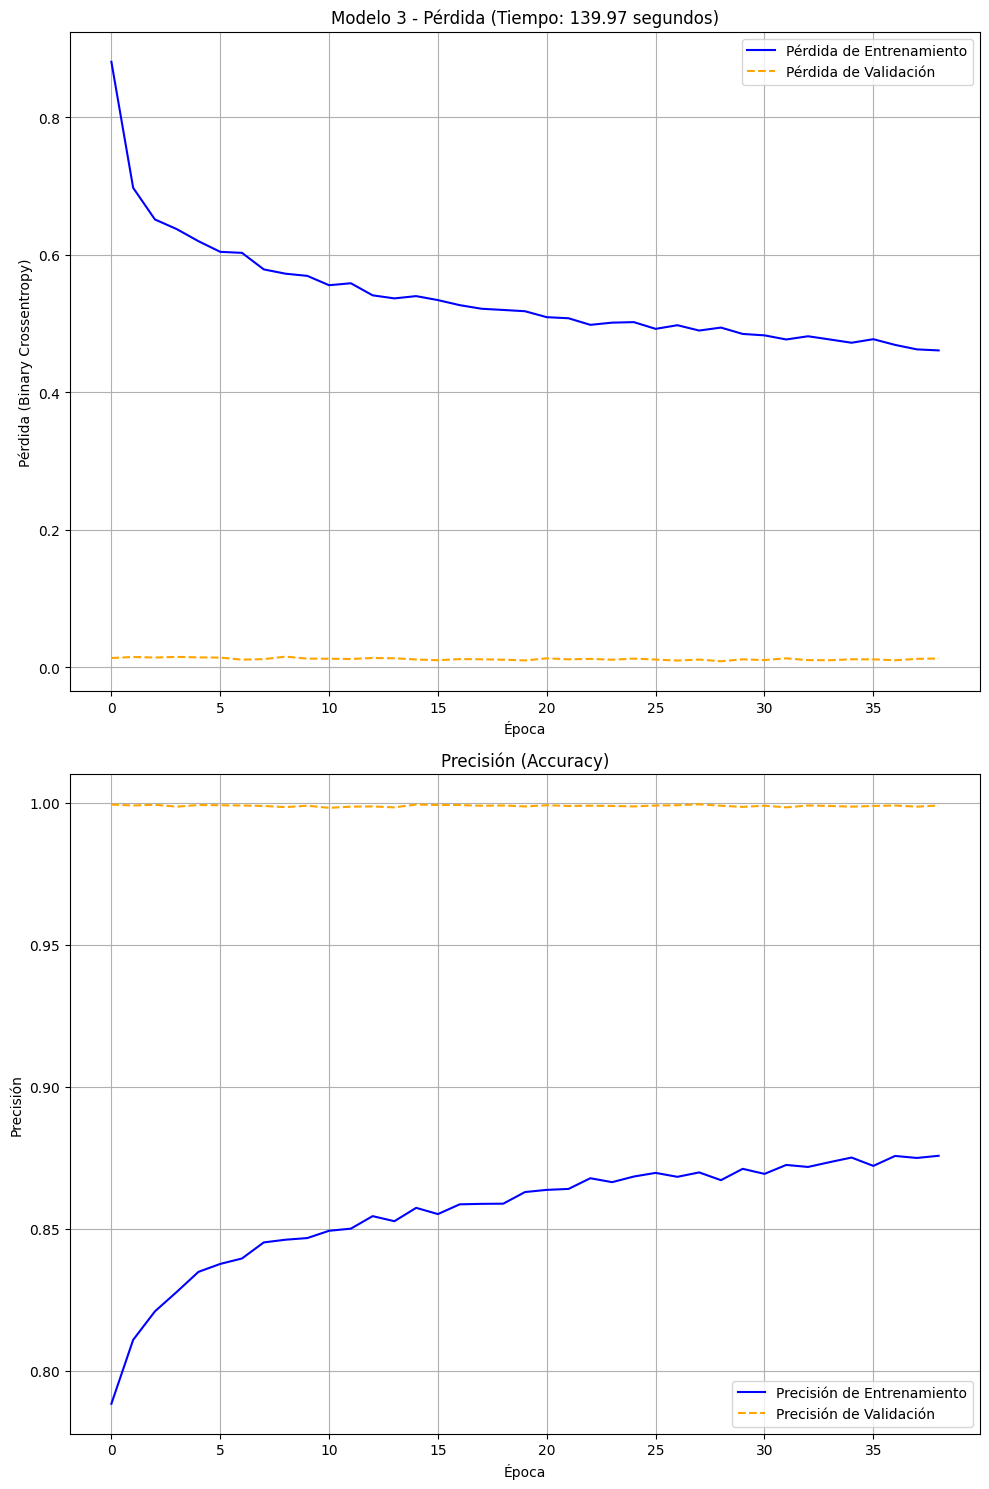

Tiempo de entrenamiento del Modelo 1: 139.97 segundos


In [29]:
# Graficar las métricas y la pérdida en subgráficas
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Pérdida (Loss)
axs[0].plot(history_1.history['loss'], label='Pérdida de Entrenamiento', color='blue')
axs[0].plot(history_1.history['val_loss'], label='Pérdida de Validación', color='orange', linestyle='--')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Pérdida (Binary Crossentropy)')
axs[0].set_title(f'Modelo 3 - Pérdida (Tiempo: {elapsed_time_1:.2f} segundos)')
axs[0].legend()
axs[0].grid(True)

# Precisión (Accuracy)
axs[1].plot(history_1.history['accuracy'], label='Precisión de Entrenamiento', color='blue')
axs[1].plot(history_1.history['val_accuracy'], label='Precisión de Validación', color='orange', linestyle='--')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Precisión')
axs[1].set_title('Precisión (Accuracy)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Tiempo de entrenamiento del Modelo 1: {elapsed_time_1:.2f} segundos")

In [22]:
# Verificar la distribución de clases después de balanceo
print("Distribución de clases en y_train después de balanceo:")
print(train_y.value_counts())

Distribución de clases en y_train después de balanceo:
y_yes
0    30194
1     2900
Name: count, dtype: int64


In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Asegurarse de que test_X está en formato de numpy array con tipo float32
test_X = np.array(test_X, dtype=np.float32)

# Obtener los valores reales y las predicciones
y_true = list(test_y)  # Convertir directamente a una lista de valores reales
y_pred1 = []

# Iterar sobre los datos de prueba para obtener las predicciones
for x in test_X:
    prediction1 = linear_model_1.predict(np.array([x]))  # Hacer predicción
    y_pred1.append(prediction1.flatten()[0])  # Aplanar y agregar predicción

umbral=0.95
# Convertir las predicciones a binario (0 o 1)
y_pred_bin1 = [1 if pred1 >= umbral else 0 for pred1 in y_pred1]

1/1 [==============================] - 0s 15ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Calcular métricas
print(classification_report(y_true, y_pred_bin1, target_names=['No Acepta', 'Acepta']))
print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred_bin1))

              precision    recall  f1-score   support

   No Acepta       0.94      0.96      0.95      7573
      Acepta       0.48      0.40      0.43       701

    accuracy                           0.91      8274
   macro avg       0.71      0.68      0.69      8274
weighted avg       0.91      0.91      0.91      8274

Matriz de confusión:
 [[7270  303]
 [ 424  277]]


### Redes 2

In [25]:
# Iniciar el cronómetro
start_time = time.time()

# Definir el modelo de red neuronal profunda con capas densas y Dropout
linear_model_2 = tf.keras.Sequential([
    norm,  # Normalización de entrada
    tf.keras.layers.Dense(units=252, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
linear_model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)
# Entrenamiento del modelo
history_2 = linear_model_2.fit(
    train_X_resampled,
    train_y_resampled,
    epochs=150,
    validation_split=0.2,
    verbose=0,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Medir el tiempo de entrenamiento
elapsed_time_2 = time.time() - start_time

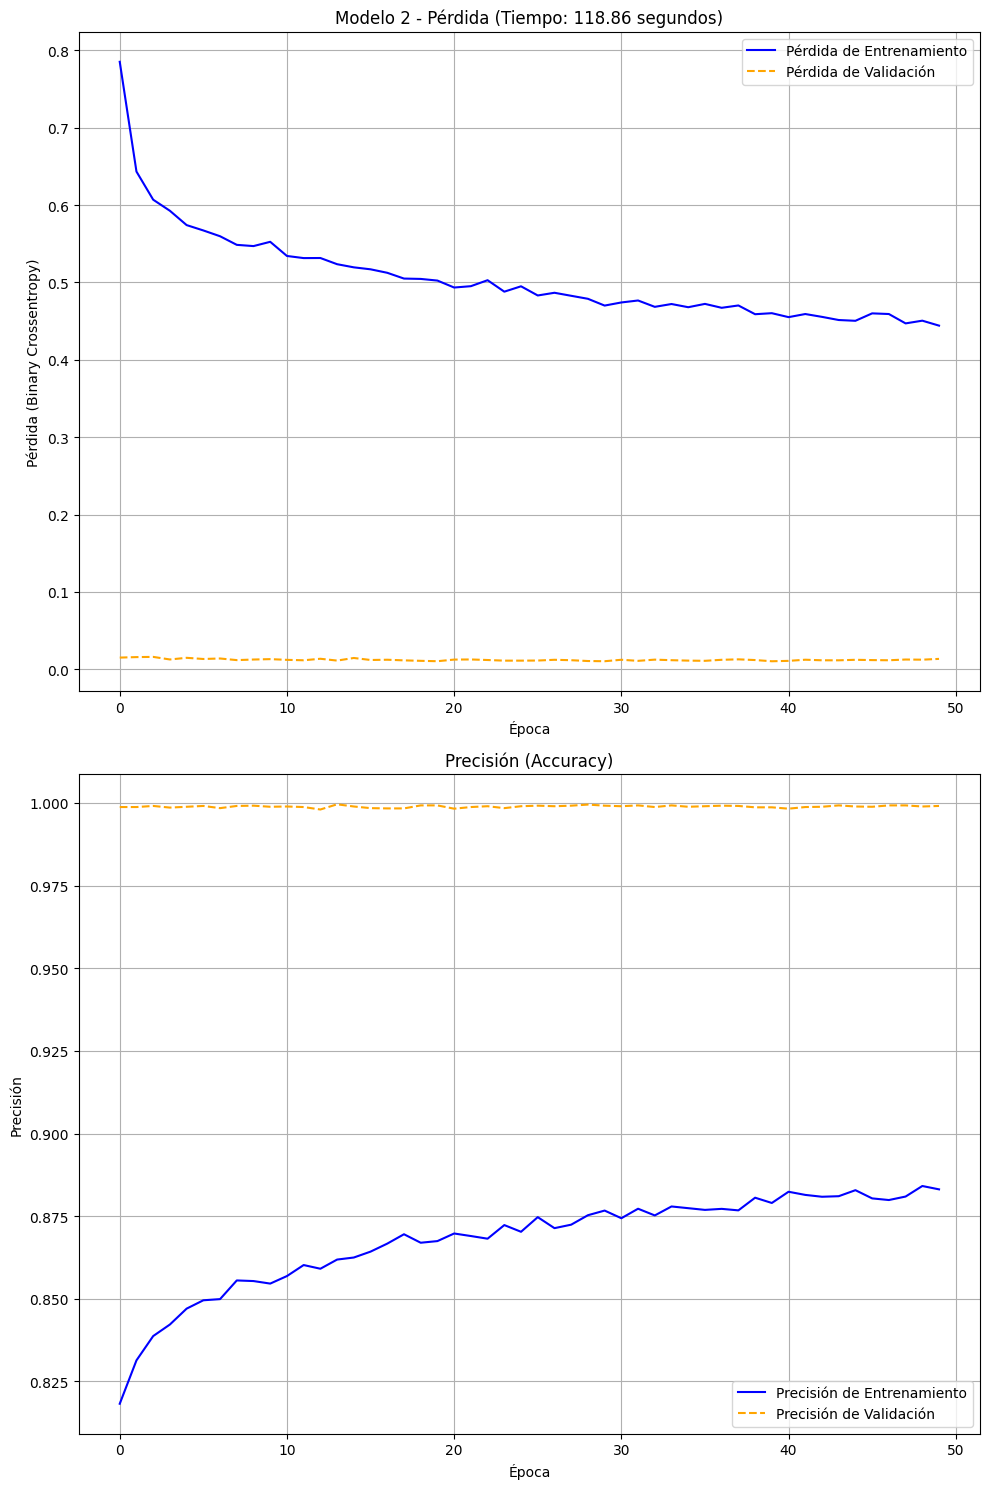

Tiempo de entrenamiento del Modelo 1: 118.86 segundos


In [26]:
# Graficar las métricas y la pérdida en subgráficas
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# Pérdida (Loss)
axs[0].plot(history_2.history['loss'], label='Pérdida de Entrenamiento', color='blue')
axs[0].plot(history_2.history['val_loss'], label='Pérdida de Validación', color='orange', linestyle='--')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Pérdida (Binary Crossentropy)')
axs[0].set_title(f'Modelo 2 - Pérdida (Tiempo: {elapsed_time_2:.2f} segundos)')
axs[0].legend()
axs[0].grid(True)

# Precisión (Accuracy)
axs[1].plot(history_2.history['accuracy'], label='Precisión de Entrenamiento', color='blue')
axs[1].plot(history_2.history['val_accuracy'], label='Precisión de Validación', color='orange', linestyle='--')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Precisión')
axs[1].set_title('Precisión (Accuracy)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Tiempo de entrenamiento del Modelo 1: {elapsed_time_2:.2f} segundos")

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Asegurarse de que test_X está en formato de numpy array con tipo float32
test_X = np.array(test_X, dtype=np.float32)

# Obtener los valores reales y las predicciones
y_true = list(test_y)  # Convertir directamente a una lista de valores reales
y_pred2= []

# Iterar sobre los datos de prueba para obtener las predicciones
for x in test_X:
    prediction2 = linear_model_1.predict(np.array([x]))  # Hacer predicción
    y_pred2.append(prediction2.flatten()[0])  # Aplanar y agregar predicción

umbral=0.5
# Convertir las predicciones a binario (0 o 1)
y_pred_bin2= [1 if pred2 >= umbral else 0 for pred2 in y_pred2]

1/1 [==============================] - 0s 16ms/step


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# Calcular métricas
print(classification_report(y_true, y_pred_bin2, target_names=['No Aprobado', 'Aprobado']))
print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred_bin2))

              precision    recall  f1-score   support

 No Aprobado       0.99      0.80      0.88      7573
    Aprobado       0.29      0.89      0.44       701

    accuracy                           0.81      8274
   macro avg       0.64      0.85      0.66      8274
weighted avg       0.93      0.81      0.85      8274

Matriz de confusión:
 [[6053 1520]
 [  74  627]]
